In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [4]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-de"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [5]:
tokenizer

PreTrainedTokenizer(name_or_path='Helsinki-NLP/opus-mt-en-de', vocab_size=58101, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'})

In [19]:
tokenizer.convert_ids_to_tokens(tokenizer("hello, this is me")['input_ids'])

['▁hello', ',', '▁this', '▁is', '▁me', '</s>']

In [26]:
tokenizer.decode(tokenizer("hello, this is me")['input_ids'])

'▁hello, this is me'

In [31]:
from sacremoses import MosesTokenizer
mt = MosesTokenizer(lang='en')
text = u'This, is a sentence with weird\xbb symbols\u2026 appearing everywhere\xbf'
expected_tokenized = u'This , is a sentence with weird \xbb symbols \u2026 appearing everywhere \xbf'

In [47]:
help(MosesTokenizer)

Help on class MosesTokenizer in module sacremoses.tokenize:

class MosesTokenizer(builtins.object)
 |  MosesTokenizer(lang='en', custom_nonbreaking_prefixes_file=None)
 |  
 |  This is a Python port of the Moses Tokenizer from
 |  https://github.com/moses-smt/mosesdecoder/blob/master/scripts/tokenizer/tokenizer.perl
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lang='en', custom_nonbreaking_prefixes_file=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  escape_xml(self, text)
 |  
 |  handles_nonbreaking_prefixes(self, text)
 |  
 |  has_numeric_only(self, text)
 |  
 |  isanyalpha(self, text)
 |  
 |  islower(self, text)
 |  
 |  penn_tokenize(self, text, return_str=False)
 |      This is a Python port of the Penn treebank tokenizer adapted by the Moses
 |      machine translation community.
 |  
 |  replace_multidots(self, text)
 |  
 |  restore_multidots(self, text)
 |  
 |  tokenize(self, text, aggressive_dash_splits=False, return_str=Fa

In [32]:
tokenized_text = mt.tokenize(text,)
tokenized_text

['This',
 ',',
 'is',
 'a',
 'sentence',
 'with',
 'weird',
 '»',
 'symbols',
 '…',
 'appearing',
 'everywhere',
 '¿']

In [33]:
tokenized_text = mt.tokenize(text, return_str=True)
tokenized_text

'This , is a sentence with weird » symbols … appearing everywhere ¿'

In [34]:
help(mt.tokenize)

Help on method tokenize in module sacremoses.tokenize:

tokenize(text, aggressive_dash_splits=False, return_str=False, escape=True, protected_patterns=None) method of sacremoses.tokenize.MosesTokenizer instance
    Python port of the Moses tokenizer.
    
        :param tokens: A single string, i.e. sentence text.
        :type tokens: str
        :param aggressive_dash_splits: Option to trigger dash split rules .
        :type aggressive_dash_splits: bool



In [45]:
sent = u"&quot; maybe i &apos;ll call some friends so we can have a laugh together &quot; said samira ford , 20 ##at##-##at## year ##at##-##at## old communications student ."

In [46]:
mt.tokenize(sent)

['&amp;',
 'quot',
 ';',
 'maybe',
 'i',
 '&amp;',
 'apos',
 ';',
 'll',
 'call',
 'some',
 'friends',
 'so',
 'we',
 'can',
 'have',
 'a',
 'laugh',
 'together',
 '&amp;',
 'quot',
 ';',
 'said',
 'samira',
 'ford',
 ',',
 '20',
 '#',
 '#',
 'at',
 '#',
 '#',
 '-',
 '#',
 '#',
 'at',
 '#',
 '#',
 'year',
 '#',
 '#',
 'at',
 '#',
 '#',
 '-',
 '#',
 '#',
 'at',
 '#',
 '#',
 'old',
 'communications',
 'student',
 '.']

In [48]:
from sacremoses import MosesDetokenizer

In [49]:
md = MosesDetokenizer(lang="en")

In [50]:
md.detokenize()

'& q u o t; m a y b e i & a p o s; l l c a l l s o m e f r i e n d s s o w e c a n h a v e a l a u g h t o g e t h e r & q u o t; s a i d s a m i r a f o r d, 2 0 # # a t # # - # # a t # # y e a r # # a t # # - # # a t # # o l d c o m m u n i c a t i o n s s t u d e n t.'

In [51]:
mt, md = MosesTokenizer(lang='en'), MosesDetokenizer(lang='en')

In [52]:
sent = "This ain't funny. It's actually hillarious, yet double Ls. | [] < > [ ] & You're gonna shake it off? Don't?"

In [53]:
expected_tokens = [u'This', u'ain', u'&apos;t', u'funny', u'.', u'It', u'&apos;s', u'actually', u'hillarious', u',', u'yet', u'double', u'Ls', u'.', u'&#124;', u'&#91;', u'&#93;', u'&lt;', u'&gt;', u'&#91;', u'&#93;', u'&amp;', u'You', u'&apos;re', u'gonna', u'shake', u'it', u'off', u'?', u'Don', u'&apos;t', u'?']

In [54]:
expected_detokens = "This ain't funny. It's actually hillarious, yet double Ls. | [] < > [] & You're gonna shake it off? Don't?"

In [55]:
mt.tokenize(sent) == expected_tokens

True

In [58]:
md.detokenize(expected_tokens) == expected_detokens

True

In [59]:
expected_tokens

['This',
 'ain',
 '&apos;t',
 'funny',
 '.',
 'It',
 '&apos;s',
 'actually',
 'hillarious',
 ',',
 'yet',
 'double',
 'Ls',
 '.',
 '&#124;',
 '&#91;',
 '&#93;',
 '&lt;',
 '&gt;',
 '&#91;',
 '&#93;',
 '&amp;',
 'You',
 '&apos;re',
 'gonna',
 'shake',
 'it',
 'off',
 '?',
 'Don',
 '&apos;t',
 '?']

In [61]:
sent = "I'll This's"
mt.tokenize(sent, return_str=True)

'I &apos;ll This &apos;s'

In [63]:
sent = "I &apos;ll This &apos;s"
mt.tokenize(sent, escape=True)

['I', '&amp;', 'apos', ';', 'll', 'This', '&amp;', 'apos', ';', 's']

In [66]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
inputs = tokenizer("The capital of France is [MASK].", return_tensors="pt")
labels = tokenizer("The capital of France is Paris.", return_tensors="pt")["input_ids"]

In [68]:
outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits
print(logits)

tensor([[[ -6.4346,  -6.4063,  -6.4097,  ...,  -5.7691,  -5.6326,  -3.7883],
         [-14.0119, -14.7240, -14.2120,  ..., -11.6976, -10.7304, -12.7618],
         [ -9.6561, -10.3125,  -9.7459,  ...,  -8.7782,  -6.6036, -12.6596],
         ...,
         [ -3.7861,  -3.8572,  -3.5644,  ...,  -2.5593,  -3.1093,  -4.3820],
         [-11.6598, -11.4274, -11.9266,  ...,  -9.8772, -10.2103,  -4.7594],
         [-11.7267, -11.7509, -11.8040,  ..., -10.5943, -10.9407,  -7.5151]]],
       grad_fn=<AddBackward0>)


In [69]:
logits.size()

torch.Size([1, 9, 30522])

In [70]:
labels.size()

torch.Size([1, 9])

In [72]:
inputs.input_ids.size()

torch.Size([1, 9])

In [3]:
from torch.nn import Transformer
import torch

In [7]:
transformer_model = Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512)) # 读入的是embedding，而不是input tokens
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)
out.size()

torch.Size([20, 32, 512])

In [1]:
from datasets import load_dataset

dataset = load_dataset("wmt14")

Downloading:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

ReadTimeout: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Read timed out. (read timeout=100.0)

In [9]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
class CosineWarmupScheduler(optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, warmup, max_iters):
        self.warmup = warmup
        self.max_num_iters = max_iters
        super().__init__(optimizer)

    def get_lr(self):
        lr_factor = self.get_lr_factor(epoch=self.last_epoch)
        return [base_lr * lr_factor for base_lr in self.base_lrs]

    def get_lr_factor(self, epoch):
        lr_factor = 0.5 * (1 + np.cos(np.pi * epoch / self.max_num_iters))
        if epoch <= self.warmup:
            lr_factor *= epoch * 1.0 / self.warmup
        return lr_factor

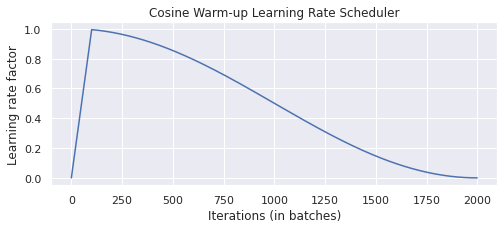

0.9938441702975689

In [12]:
# Needed for initializing the lr scheduler
p = nn.Parameter(torch.empty(4, 4))
optimizer = optim.Adam([p], lr=1e-3)
lr_scheduler = CosineWarmupScheduler(optimizer=optimizer, warmup=100, max_iters=2000)

# Plotting
epochs = list(range(2000))
sns.set()
plt.figure(figsize=(8, 3))
plt.plot(epochs, [lr_scheduler.get_lr_factor(e) for e in epochs])
plt.ylabel("Learning rate factor")
plt.xlabel("Iterations (in batches)")
plt.title("Cosine Warm-up Learning Rate Scheduler")
plt.show()
sns.reset_orig()
lr_scheduler.get_lr_factor(100)

In [14]:
(np.cos(np.pi*0.05)+1)/2

0.9938441702975689